# ATP Tennis Data - Player History Percentage (5 Matches)




We will add the following columns for each player:


* winning percentage = wins / (wins + losses)
* games won percetnage = games won / (games won + games lost)
* sets won percentage = sets won / (sets won + sets lost)

We will see if this data helps improve our models

### Results from our best model so far

```
Model Score: 0.6906819716407833

ROC/AUC Score: 0.6906426130517523
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.69      7381
         Win       0.69      0.70      0.70      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810
```

# Summary of Results

Again, we see a slight dip in our accuracy when we only use percentage data for our model

```
Model Score: 0.6856853477380148

ROC/AUC Score: 0.685647687417948
              precision    recall  f1-score   support

        Loss       0.69      0.67      0.68      7381
         Win       0.68      0.70      0.69      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-history_percentage"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-ohe-history5-matchup5-stats5.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
else:
    # update this
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe-history5-matchup5-stats5.csv'


START_YEAR = 1998
END_YEAR = 2018




In [3]:
import re

def filter_features(data: pd.DataFrame):
    print(f'Before: data.shape {data.shape} data.shape {data.shape}')

    
    matchup_columns = [col for col in data.columns if re.search('matchup', col)]
    data = data.drop(matchup_columns, axis=1)

    # drop all history columns that doesn't have percentage
    history_columns = [col for col in data.columns if re.search('history', col) and not re.search('percentage', col)]
    data = data.drop(history_columns, axis=1)

    # drop all history diff columns
    history_diff_columns = [col for col in data.columns if re.search(r'history.+diff', col)]
    data = data.drop(history_diff_columns, axis=1)
    
    stats_columns = [col for col in data.columns if re.search("stats", col)]
    data = data.drop(stats_columns, axis=1)


    print(f'After: data.shape {data.shape} data.shape {data.shape}')
    
    return data

Before: X_train.shape (44429, 5299) X_test.shape (14810, 5299)
After: X_train.shape (44429, 5263) X_test.shape (14810, 5263)


In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, data_filter = filter_features)

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

# Logistic Regression

In [4]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.662390276839973

ROC/AUC Score: 0.662385855028014
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4879  2502
Win   2498  4931


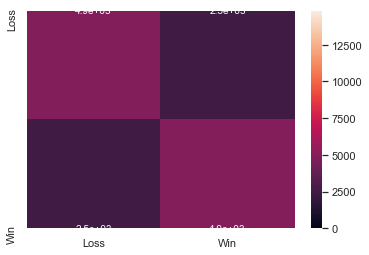

In [5]:
lr.analyze()

In [6]:
# ju.plot_2d(X_test, y_predict_lr)

In [7]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [8]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_knn = knn.predict()

Model Score: 0.6107359891964889

ROC/AUC Score: 0.6107456873632006
              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4530  2851
Win   2914  4515


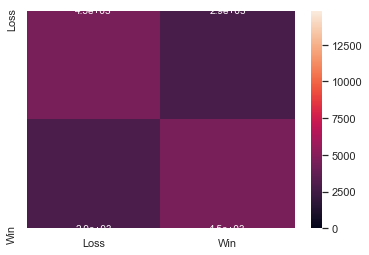

In [9]:
knn.analyze()

In [10]:
# ju.plot_2d(X_test, y_predict_knn)

In [11]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [12]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_dt = dt.predict()

Model Score: 0.6043889264010803

ROC/AUC Score: 0.6043989955838817
              precision    recall  f1-score   support

        Loss       0.60      0.61      0.60      7381
         Win       0.61      0.60      0.60      7429

    accuracy                           0.60     14810
   macro avg       0.60      0.60      0.60     14810
weighted avg       0.60      0.60      0.60     14810

      Loss   Win
Loss  4484  2897
Win   2962  4467


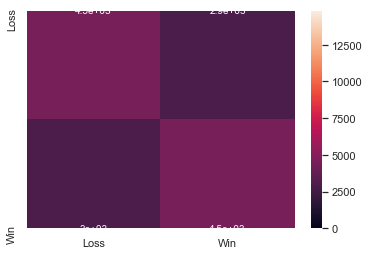

In [13]:
dt.analyze()

In [14]:
# ju.plot_2d(X_test, y_predict_dt)

In [15]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [16]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.636664415935179

ROC/AUC Score: 0.6368967325035491
              precision    recall  f1-score   support

        Loss       0.62      0.71      0.66      7381
         Win       0.66      0.57      0.61      7429

    accuracy                           0.64     14810
   macro avg       0.64      0.64      0.63     14810
weighted avg       0.64      0.64      0.63     14810

      Loss   Win
Loss  5230  2151
Win   3230  4199


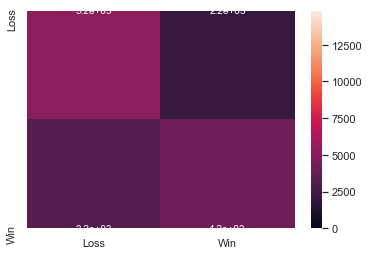

In [17]:
rf.analyze()

In [18]:
# ju.plot_2d(X_test, y_predict_rf)

In [19]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [20]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3670            9.20m
         2           1.3505            9.25m
         3           1.3357            9.09m
         4           1.3238            8.92m
         5           1.3131            8.74m
         6           1.3044            8.60m
         7           1.2958            8.48m
         8           1.2885            8.36m
         9           1.2820            8.25m
        10           1.2764            8.15m
        20           1.2390            7.39m
        30           1.2092            6.46m
        40           1.1905            5.55m
        50           1.1770            4.61m
        60           1.1677            3.68m
        70           1.1608            2.75m
        80           1.1577            1.82m
        90           1.1549           54.23s


Model Score: 0.6856853477380148

ROC/AUC Score: 0.685647687417948
              precision    recall  f1-score   support

        Loss       0.69      0.67      0.68      7381
         Win       0.68      0.70      0.69      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810

      Loss   Win
Loss  4975  2406
Win   2249  5180


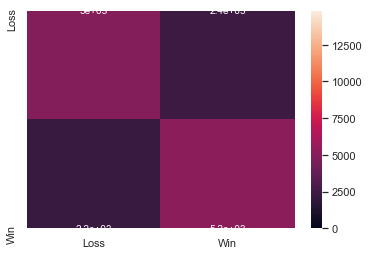

In [21]:
gb.analyze()

In [22]:
# ju.plot_2d(X_test, y_predict_gb)

In [23]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [24]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_ab = ab.predict()

Model Score: 0.6673869007427414

ROC/AUC Score: 0.6673216926405633
              precision    recall  f1-score   support

        Loss       0.67      0.65      0.66      7381
         Win       0.66      0.69      0.67      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4777  2604
Win   2322  5107


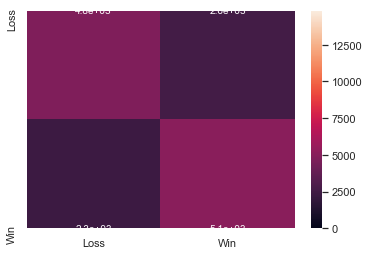

In [25]:
ab.analyze()

In [26]:
# ju.plot_2d(X_test, y_predict_ab)

In [27]:
ab.save()

Saving report: ../reports/summary.csv


# Results


In [28]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
54,LogisticRegression,ohe-history_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.662390,0.662386,"{""0"": {""0"": 4879, ""1"": 2498}, ""1"": {""0"": 2502,...","{""Loss"": {""precision"": 0.6613799647553206, ""re...",../models/logisticregression-1998-2018-ohe-his...,0.0,0.0,0.0
55,KNeighborsClassifier,ohe-history_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.610736,0.610746,"{""0"": {""0"": 4530, ""1"": 2914}, ""1"": {""0"": 2851,...","{""Loss"": {""precision"": 0.608543793659323, ""rec...",../models/kneighborsclassifier-1998-2018-ohe-h...,0.0,0.0,0.0
56,DecisionTreeClassifier,ohe-history_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.604389,0.604399,"{""0"": {""0"": 4484, ""1"": 2962}, ""1"": {""0"": 2897,...","{""Loss"": {""precision"": 0.6022025248455547, ""re...",../models/decisiontreeclassifier-1998-2018-ohe...,0.0,0.0,0.0
57,RandomForestClassifier,ohe-history_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.636664,0.636897,"{""0"": {""0"": 5230, ""1"": 3230}, ""1"": {""0"": 2151,...","{""Loss"": {""precision"": 0.6182033096926713, ""re...",../models/randomforestclassifier-1998-2018-ohe...,0.0,0.0,0.0
58,GradientBoostingClassifier,ohe-history_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.685685,0.685648,"{""0"": {""0"": 4975, ""1"": 2249}, ""1"": {""0"": 2406,...","{""Loss"": {""precision"": 0.6886766334440753, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,9.0,9.0
59,AdaBoostClassifier,ohe-history_percentage,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.667387,0.667322,"{""0"": {""0"": 4777, ""1"": 2322}, ""1"": {""0"": 2604,...","{""Loss"": {""precision"": 0.6729116777010846, ""re...",../models/adaboostclassifier-1998-2018-ohe-his...,0.0,1.0,1.0


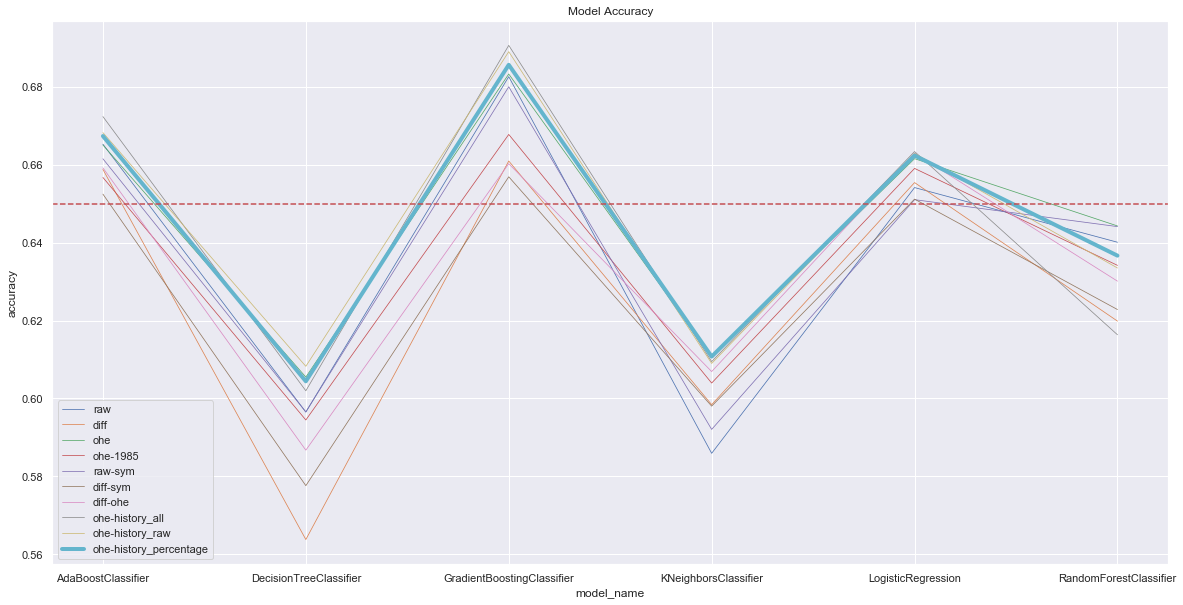

In [29]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


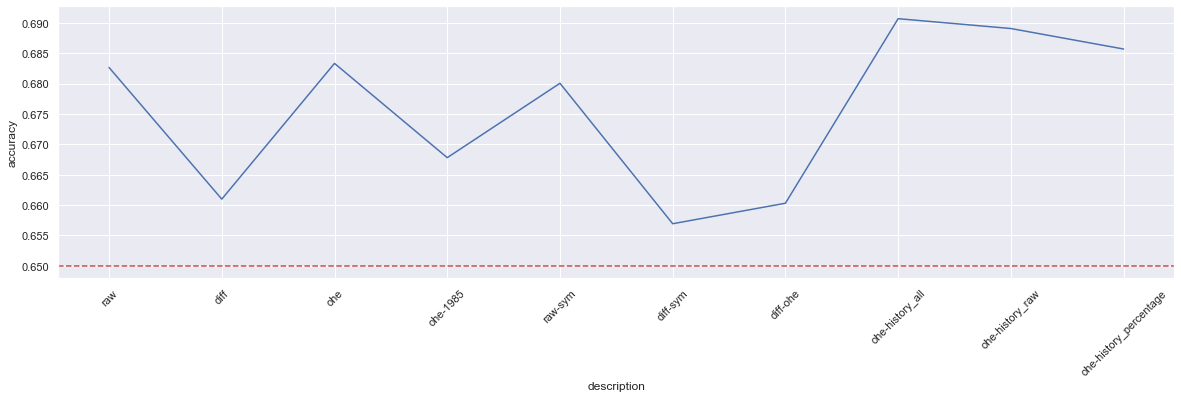

In [30]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [31]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [32]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

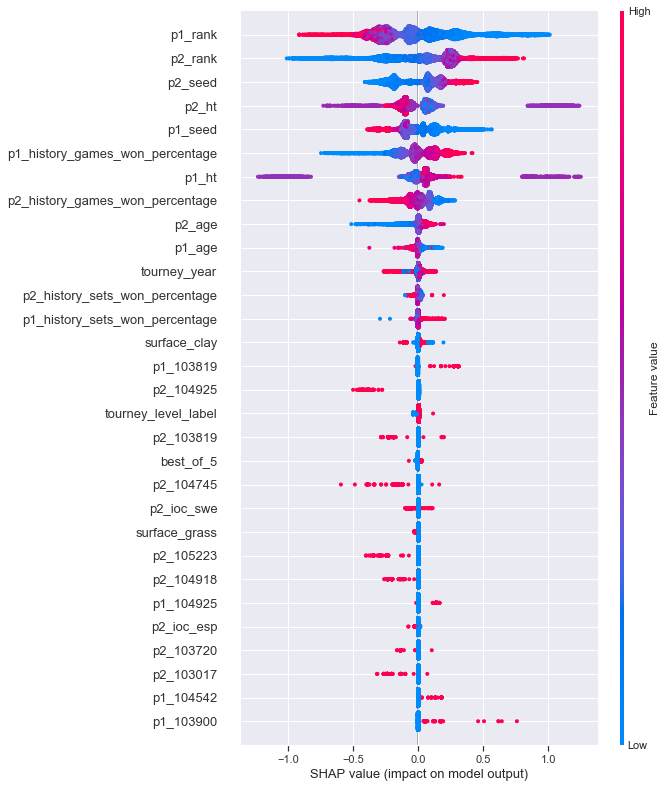

In [33]:
shap.summary_plot(shap_values, X_test, max_display=30)

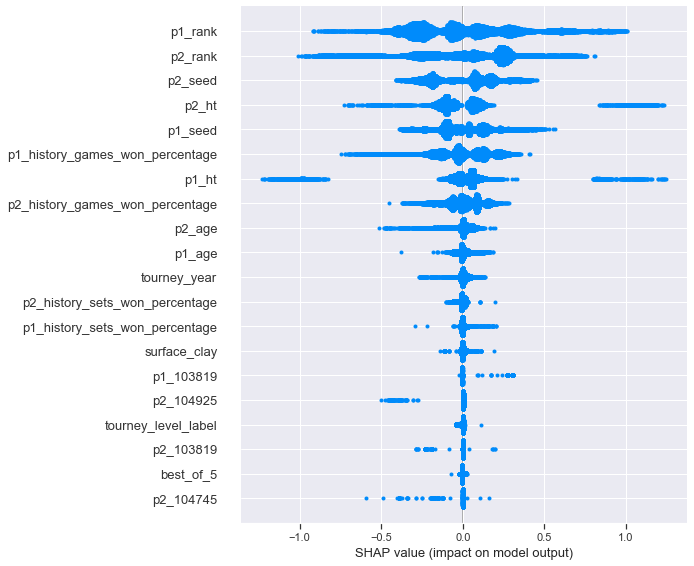

In [34]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

In [35]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-21 02:40
